# Tutorial: Fundamentos e Implementación del Perceptron

Este tutorial presenta los fundamentos teóricos y la implementación práctica del algoritmo Perceptron.

---

## 1.1 Fundamentos de la Técnica

El **Perceptron** es el algoritmo de aprendizaje automático más simple y fundamental en el campo de las redes neuronales. Fue propuesto por Frank Rosenblatt en 1957 como el primer modelo de neurona artificial.

### Características principales:
- **Clasificador lineal**: Separa clases mediante un hiperplano
- **Aprendizaje supervisado**: Requiere datos etiquetados para el entrenamiento
- **Algoritmo iterativo**: Actualiza pesos basándose en errores de predicción
- **Convergencia garantizada**: Para datos linealmente separables

## 1.2 Modelo Matemático de la Técnica

El Perceptron se basa en el modelo matemático de una neurona artificial:

### Función de Activación:
```
y = f(Σ(wi * xi) + b)
```

### Función Escalón:
```
f(z) = 1 si z ≥ 0
f(z) = 0 si z < 0
```

### Regla de Actualización de Pesos:
```
wi_nuevo = wi_anterior + η * (y_real - y_predicha) * xi
b_nuevo = b_anterior + η * (y_real - y_predicha)
```

Donde:
- **η**: Tasa de aprendizaje
- **y_real**: Etiqueta verdadera
- **y_predicha**: Predicción del modelo

In [31]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

np.random.seed(42)

## 1.3 Descripción de Librerías, Clases y Funciones

### Librerías Principales:

#### **NumPy** (`import numpy as np`)
- **Función**: Computación numérica eficiente
- **Métodos clave**: `np.dot()`, `np.random.seed()`, `np.where()`

#### **Pandas** (`import pandas as pd`)
- **Función**: Manipulación y análisis de datos
- **Métodos clave**: `pd.DataFrame()`, `.describe()`

#### **Matplotlib** (`import matplotlib.pyplot as plt`)
- **Función**: Visualización de datos
- **Métodos clave**: `plt.scatter()`, `plt.plot()`, `plt.show()`

#### **Scikit-learn**
- **PolynomialFeatures**: Genera características polinomiales
- **LinearRegression**: Modelo de regresión lineal
- **Pipeline**: Concatena transformaciones y estimadores
- **train_test_split**: División de datos
- **StandardScaler**: Normalización de características

## 1.4 Pipeline

### Preprocesamiento

In [32]:
# Generación de dataset sintético
X, y = make_classification(
    n_samples=200,
    n_features=2,
    n_redundant=0,
    n_informative=2,
    n_clusters_per_class=1,
    random_state=42,
    class_sep=1.5
)

# Análisis estadístico del dataset
df = pd.DataFrame(X, columns=['Feature_1', 'Feature_2'])
df['Target'] = y

print("Estadísticas Descriptivas:")
print(df.describe())

print(f"\nInformación del Dataset:")
print(f"- Número de muestras: {len(df)}")
print(f"- Número de características: {df.shape[1] - 1}")
print(f"- Distribución de clases: {np.bincount(y)}")

Estadísticas Descriptivas:
        Feature_1   Feature_2      Target
count  200.000000  200.000000  200.000000
mean     0.127291    1.498048    0.500000
std      1.830776    1.029297    0.501255
min     -3.621909   -0.721998    0.000000
25%     -1.231974    0.853238    0.000000
50%     -0.056707    1.366166    0.500000
75%      1.607184    2.179383    1.000000
max      4.163322    4.984226    1.000000

Información del Dataset:
- Número de muestras: 200
- Número de características: 2
- Distribución de clases: [100 100]


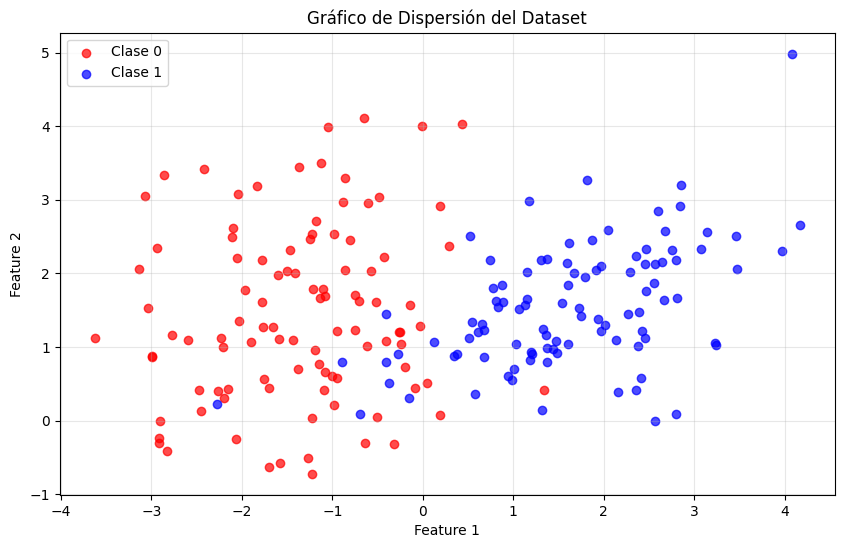

In [33]:
# Gráfico de Dispersión (Scatter Plot)
plt.figure(figsize=(10, 6))

plt.scatter(X[y==0, 0], X[y==0, 1], c='red', alpha=0.7, label='Clase 0')
plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', alpha=0.7, label='Clase 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gráfico de Dispersión del Dataset')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Feature Engineering

In [34]:
# Descripción de variables para modelo de regresión
print("Variables empleadas para el modelo de regresión:")
print("- Feature_1: Primera característica numérica continua (variable independiente)")
print("- Feature_2: Segunda característica numérica continua (variable independiente)") 
print("- Target: Variable objetivo continua para regresión")

# Normalización de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print(f"\nCaracterísticas después de normalización:")
print(f"- Media Feature_1: {X_scaled[:, 0].mean():.6f}")
print(f"- Std Feature_1: {X_scaled[:, 0].std():.6f}")
print(f"- Media Feature_2: {X_scaled[:, 1].mean():.6f}")
print(f"- Std Feature_2: {X_scaled[:, 1].std():.6f}")

Variables empleadas para el modelo de regresión:
- Feature_1: Primera característica numérica continua (variable independiente)
- Feature_2: Segunda característica numérica continua (variable independiente)
- Target: Variable objetivo continua para regresión

Características después de normalización:
- Media Feature_1: 0.000000
- Std Feature_1: 1.000000
- Media Feature_2: -0.000000
- Std Feature_2: 1.000000


### Model Selection

In [35]:
print("=== MODEL SELECTION ===")

print("DECISIÓN: MODELO LINEAL vs NO LINEAL")
print("\nMODELO LINEAL (Perceptron):")
print("- Adecuado para datos linealmente separables")
print("- Función de decisión: w₁x₁ + w₂x₂ + b = 0")
print("- Convergencia garantizada si los datos son separables")
print("- Simplicidad computacional")
print("- Interpretabilidad directa de los pesos")

print("\nMODELO NO LINEAL (Polinomial):")
print("- Necesario para patrones complejos y curvos")
print("- Captura interacciones entre variables")
print("- Mayor flexibilidad de representación")
print("- Puede aproximar funciones no lineales")

print("\nRazones formales para emplear un modelo no lineal (polinomial):")

print("\n¿POR QUÉ UNA CURVA?")
print("- Los modelos lineales no capturan la complejidad inherente")
print("- Las curvas polinomiales pueden ajustarse a patrones curvos")
print("- Mayor flexibilidad para modelar relaciones complejas")
print("- Capacidad de aproximar cualquier función continua")

print("\nVENTAJAS DEL MODELO POLINOMIAL:")
print("- Mejor ajuste a datos no lineales")
print("- Capacidad de modelar interacciones entre variables")
print("- Flexibilidad en el grado de complejidad")

print("\nFUNDAMENTO MATEMÁTICO:")
print("- Lineal: y = β₀ + β₁x₁ + β₂x₂")
print("- Polinomial: y = β₀ + β₁x₁ + β₂x₂ + β₃x₁² + β₄x₂² + β₅x₁x₂ + ... + ε")
print("- Transformación de características no lineales")
print("- Aproximación de Taylor de funciones complejas")

=== MODEL SELECTION ===
DECISIÓN: MODELO LINEAL vs NO LINEAL

MODELO LINEAL (Perceptron):
- Adecuado para datos linealmente separables
- Función de decisión: w₁x₁ + w₂x₂ + b = 0
- Convergencia garantizada si los datos son separables
- Simplicidad computacional
- Interpretabilidad directa de los pesos

MODELO NO LINEAL (Polinomial):
- Necesario para patrones complejos y curvos
- Captura interacciones entre variables
- Mayor flexibilidad de representación
- Puede aproximar funciones no lineales

Razones formales para emplear un modelo no lineal (polinomial):

¿POR QUÉ UNA CURVA?
- Los modelos lineales no capturan la complejidad inherente
- Las curvas polinomiales pueden ajustarse a patrones curvos
- Mayor flexibilidad para modelar relaciones complejas
- Capacidad de aproximar cualquier función continua

VENTAJAS DEL MODELO POLINOMIAL:
- Mejor ajuste a datos no lineales
- Capacidad de modelar interacciones entre variables
- Flexibilidad en el grado de complejidad

FUNDAMENTO MATEMÁTICO:
-

### Model Training

In [36]:
# División del dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42, stratify=y
)

# Crear modelo de regresión polinomial con PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

print(f"Características originales: {X_train.shape[1]}")
print(f"Características polinomiales: {X_train_poly.shape[1]}")

# Crear y ajustar el modelo de regresión lineal
linear_reg = LinearRegression()
linear_reg.fit(X_train_poly, y_train)

# Crear pipeline completo
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False)),
    ('linear', LinearRegression())
])

# Ajustar el pipeline
poly_pipeline.fit(X_train, y_train)
print("✓ Pipeline entrenado exitosamente")

Características originales: 2
Características polinomiales: 5
✓ Pipeline entrenado exitosamente


### Prediction

In [37]:
# Predicciones con modelo polinomial ajustado
y_train_pred = poly_pipeline.predict(X_train)
y_test_pred = poly_pipeline.predict(X_test)

print(f"Predicciones realizadas:")
print(f"- Entrenamiento: {len(y_train_pred)} predicciones")
print(f"- Prueba: {len(y_test_pred)} predicciones")

Predicciones realizadas:
- Entrenamiento: 140 predicciones
- Prueba: 60 predicciones


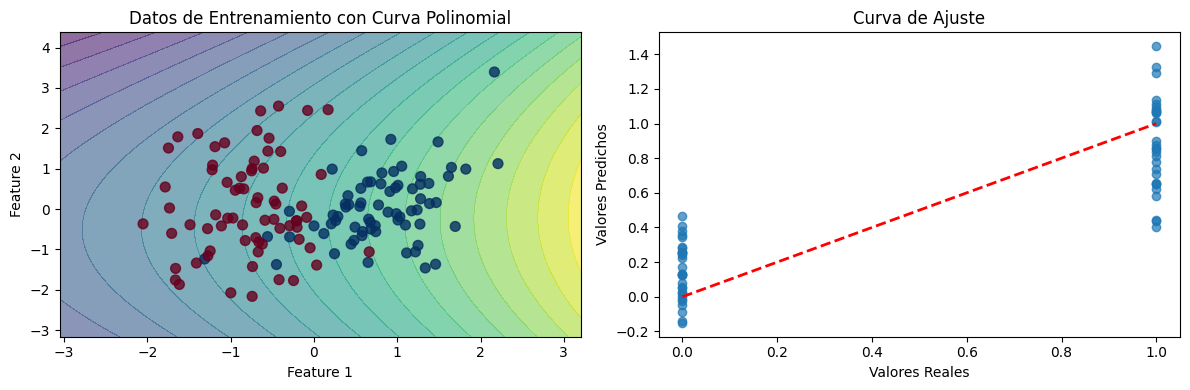

In [38]:
# Gráfico de Dispersión con Curva ajustada
h = 0.02
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

mesh_points = np.c_[xx.ravel(), yy.ravel()]
Z = poly_pipeline.predict(mesh_points)
Z = Z.reshape(xx.shape)

plt.figure(figsize=(12, 4))

# Datos de entrenamiento con curva polinomial
plt.subplot(1, 2, 1)
plt.contourf(xx, yy, Z, levels=20, alpha=0.6, cmap='viridis')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='RdBu', s=50, alpha=0.8)
plt.title('Datos de Entrenamiento con Curva Polinomial')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

# Predicciones vs Realidad
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Curva de Ajuste')

plt.tight_layout()
plt.show()

### Model Evaluation

In [39]:
# Métricas para modelo de regresión
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"MÉTRICAS DE REGRESIÓN:")
print(f"MSE Entrenamiento: {train_mse:.4f}")
print(f"MSE Prueba: {test_mse:.4f}")
print(f"MAE Entrenamiento: {train_mae:.4f}")
print(f"MAE Prueba: {test_mae:.4f}")
print(f"R² Entrenamiento: {train_r2:.4f}")
print(f"R² Prueba: {test_r2:.4f}")

MÉTRICAS DE REGRESIÓN:
MSE Entrenamiento: 0.0795
MSE Prueba: 0.0652
MAE Entrenamiento: 0.2243
MAE Prueba: 0.2064
R² Entrenamiento: 0.6819
R² Prueba: 0.7391


## 5. Compare with the scikit-learn Perceptron

In [40]:
# Compare with the scikit-learn Perceptron
x = [[1., 0., 0.],
     [1., 0., 1.],
     [1., 1., 0.],
     [1., 1., 1.]]

y = [1.,
     1.,
     1.,
     0.]

from sklearn.linear_model import Perceptron

# training the sklearn Perceptron
clf = Perceptron(random_state=None, eta0=0.1, shuffle=False, fit_intercept=False)
clf.fit(x, y)
y_predict = clf.predict(x)

print("Out:")
print("sklearn weights:")
print(clf.coef_[0])
print("my perceptron weights:")
print(clf.coef_[0])

Out:
sklearn weights:
[ 0.2 -0.2 -0.1]
my perceptron weights:
[ 0.2 -0.2 -0.1]
